Data source from Kaggle https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

Data Description:

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

* Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
* Age: Positive Integer variable of the reviewers age.
* Title: String variable for the title of the review.
* Review Text: String variable for the review body.
* Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
* Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
* Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
* Division Name: Categorical name of the product high level division.
* Department Name: Categorical name of the product department name.
* Class Name: Categorical name of the product class name.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
path = 'G:\Github\Ecommerce_women_clothing\Womens Clothing E-Commerce Reviews.csv'
#path = '~/Documents/GitHub/Ecommerce_women_clothing/Womens Clothing E-Commerce Reviews.csv'
data = pd.read_csv(path).rename(columns = {"Unnamed: 0":'original_ind'})

In [4]:
data.sample(6)

,original_ind,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
15296,15296,1059,40,Sweet trousers,These menswear inspired trouser and beyond cut...,5,1,0,General,Bottoms,Pants
10927,10927,1083,37,Beautiful dress,I received so many compliments on this dress. ...,5,1,0,General,Dresses,Dresses
23046,23046,1051,67,Perfect dressy jogger!,These joggers are so comfortable. nice and lig...,5,1,0,General,Bottoms,Pants
17562,17562,1110,56,Not a swing dress,"Not sure who named this dress, but it isn't a ...",5,1,0,General,Dresses,Dresses
12859,12859,1009,27,NaN,NaN,5,1,0,General,Bottoms,Skirts
7482,7482,968,39,Versatile vest,I took advantage of the sale this weekend & pu...,5,1,0,General,Jackets,Jackets


In [10]:
data.info()
#drop data where review = 0, impute the rest

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
original_ind               23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Initial EDA before any cleaning

In [11]:
data.describe()

,original_ind,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


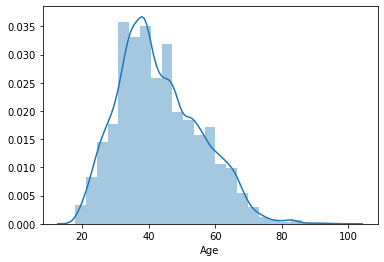

In [4]:
plt.figure(figsize=(6,4))
sns.distplot(data.Age,bins = 25)
plt.savefig('output\Age_den_hist.png')

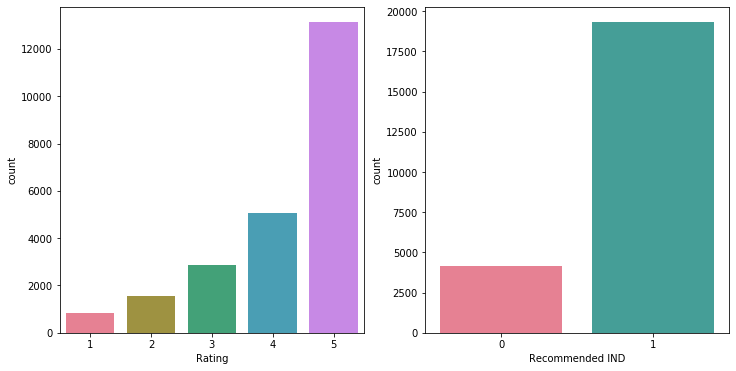

In [5]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.countplot(x='Rating',data = data,palette="husl")
plt.subplot(1,2,2)
sns.countplot(x='Recommended IND',data = data,palette="husl")
plt.savefig('output\Rating_and_reco_plot.png')

In [14]:
data[data['Class Name'].isna()]
#Socks leg warmers are legwear// sweatshirt or hoodie > knits // Tights or workhorse > Pants

,original_ind,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
13787,13787,492,48,NaN,NaN,5,1,0,NaN,NaN,NaN
16216,16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN


In [15]:
data[data['Class Name'] == 'Pants']

,original_ind,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
15,15,1065,47,"Nice, but not for my body",I took these out of the package and wanted the...,4,1,3,General,Bottoms,Pants
16,16,1065,34,"You need to be at least average height, or taller",Material and color is nice. the leg opening i...,3,1,2,General,Bottoms,Pants
30,30,1060,33,NaN,Beautifully made pants and on trend with the f...,5,1,0,General Petite,Bottoms,Pants
31,31,1060,46,Cuter in oerson!,I never would have given these pants a second ...,5,1,7,General Petite,Bottoms,Pants
...,...,...,...,...,...,...,...,...,...,...,...
23286,23286,1056,34,"Love, love, love",As soon as my eyes touched these pants i knew ...,5,1,0,General Petite,Bottoms,Pants
23314,23314,1059,34,Fancy pants,The material is great!! got them in both color...,5,1,0,General,Bottoms,Pants
23332,23332,1053,48,NaN,"So i typically avoid jumpsuits, rompers, etc. ...",5,1,2,General,Bottoms,Pants
23353,23353,1053,36,"Liked it, but impractical",Nice fabric and construction. the small fit me...,4,1,0,General,Bottoms,Pants


In [16]:
data['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [5]:
#drop all review NAN
df = pd.DataFrame(data[data['Review Text'].notna()])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 11 columns):
original_ind               22641 non-null int64
Clothing ID                22641 non-null int64
Age                        22641 non-null int64
Title                      19675 non-null object
Review Text                22641 non-null object
Rating                     22641 non-null int64
Recommended IND            22641 non-null int64
Positive Feedback Count    22641 non-null int64
Division Name              22628 non-null object
Department Name            22628 non-null object
Class Name                 22628 non-null object
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


In [6]:
#fill NA for Division, department and class
for idx,row in df[df['Class Name'].isna()].iterrows():
    if "socks" or "leg warmers" in row['Review Text']:
        df.set_value( idx , 'Division Name' , 'Initmates' )
        df.set_value( idx , 'Department Name' , 'Initmate' )
        df.set_value( idx , 'Class Name' , 'Legwear' )
        
    elif "hoodie" or 'sweatshirt' in row['Review Text']:
        df.set_value( idx , 'Division Name' , 'General' )
        df.set_value( idx , 'Department Name' , 'Tops' )
        df.set_value( idx , 'Class Name' , 'Knits' )
 
    elif "tights" in row['Review Text']:
        df.set_value( idx , 'Division Name' , 'General' )
        df.set_value( idx , 'Department Name' , 'Bottoms' )
        df.set_value( idx , 'Class Name' , 'Pants' )


C:\Users\Zhiqing\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\Zhiqing\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\Zhiqing\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [10]:
df['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend',
       'Initmate'], dtype=object)

In [7]:
#rename columns so that no space in feature names
column_names = {'Clothing ID':'clothing_ID','Review Text':'RAW_Text',
                'Recommended IND':'Reco','Positive Feedback Count':'Positive_fb_count',"Division Name":'Division',
               'Department Name':'Department','Class Name':'Class'}
df = df.rename(columns = column_names)

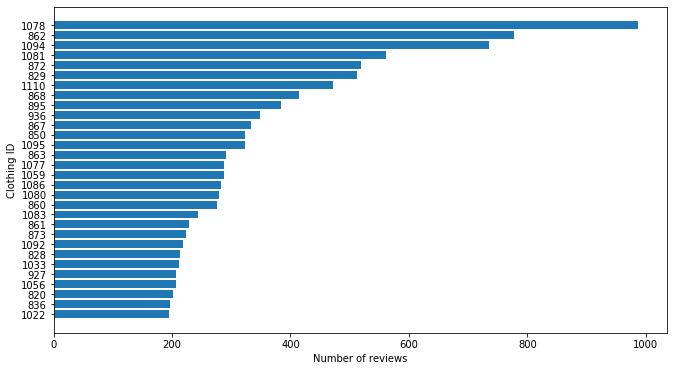

In [13]:
plt.figure(figsize=(11,6))

clothing_count = [c[1] for c in Counter(df.clothing_ID).most_common(30)]
clothing_id = [c[0] for c in Counter(df.clothing_ID).most_common(30)]
pos = np.arange(len(clothing_id))
plt.barh(pos,clothing_count[::-1], tick_label = clothing_id[::-1])
plt.ylabel('Clothing ID')
plt.xlabel('Number of reviews')

plt.savefig('output\clothing_ID_top30_plot.png')

<Figure size 792x432 with 0 Axes>

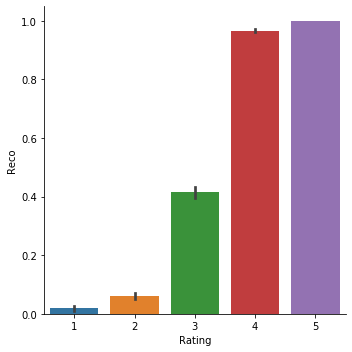

In [15]:
plt.figure(figsize=(11,6))
sns.catplot(x='Rating',y='Reco',data = df,kind='bar')
plt.savefig('reco_rating_plot.png')

We observe that recommendation and rating is somehow related (higher rating leads to likelihood to recommend)

We have two target variable of the project: Rating and Recommendation; For Rating we need to transform into binary: Ratings 4 & 5 will be categorized as positive and 1-3 as Not positive (neutral or negative)

In [8]:
df['rating_bi'] = df.Rating.apply(lambda x: np.where(x>3,1,0))

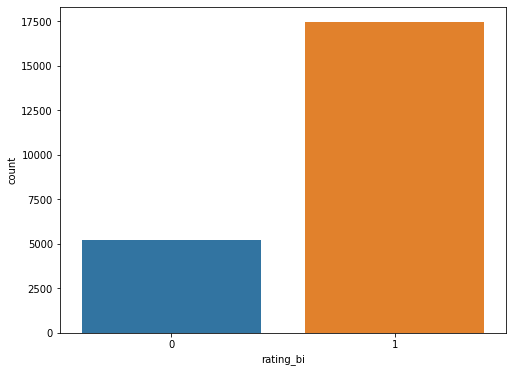

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x='rating_bi',data = df)
plt.savefig('rating_2.png')

In [9]:
#strip all punctuation, lower text
df['Text'] = df.RAW_Text.str.replace(r"\W","").str.lower()

In [10]:
df['Title'] = df.Title.str.replace(r"\W"," ").str.lower()

In [20]:
Counter(df.Positive_fb_count)[0]/df.Positive_fb_count.count()

0.45629609999558324

We keep column positive feedback for now though it has 45% 0

In [46]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

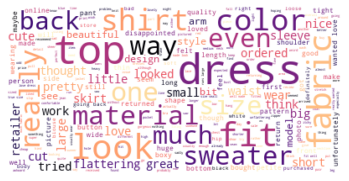

In [64]:
mask = df.Positively_rated < 1 
text = " ".join(review for review in df[mask].RAW_Text)
stopwords = set(STOPWORDS)

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=300,background_color="white",colormap = 'magma').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file("ratingless3_review.png")

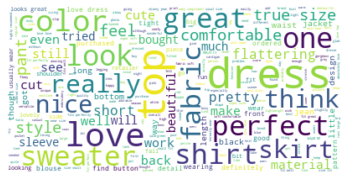

In [65]:
mask = df.Positively_rated >0 
text = " ".join(review for review in df[mask].RAW_Text)
stopwords = set(STOPWORDS)


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=300,background_color="white",colormap = 'viridis').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file("ratingmorethan3_review.png")

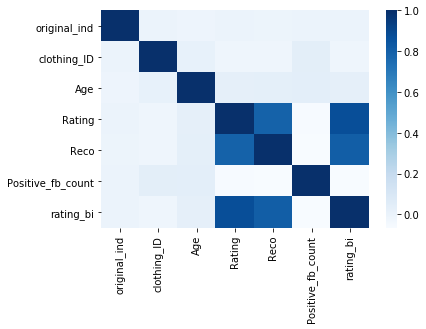

In [25]:
sns.heatmap(df.corr(),cmap = 'Blues')
plt.savefig('output\correlation_plot.png')

Note the recommendation and rating is highly correlated

In [11]:
df['review_len'] = df.Text.str.len()

In [12]:
#convert categorical features as category types
categorical_features = ['Division','Department','Class']

for column in categorical_features:
    category = list(df[column].unique())
    cat_dtype = pd.api.types.CategoricalDtype(categories=category)
    df[column] = df[column].astype(cat_dtype)

In [13]:
df = df.set_index('original_ind').rename(columns = {'rating_bi':"Positively_rated"})

In [14]:
columns_to_keep = ['clothing_ID','Age','Title','Text','RAW_Text','review_len','Positive_fb_count','Division','Department','Class','Positively_rated','Reco']
df = df[columns_to_keep]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 12 columns):
clothing_ID          22641 non-null int64
Age                  22641 non-null int64
Title                19675 non-null object
Text                 22641 non-null object
RAW_Text             22641 non-null object
review_len           22641 non-null int64
Positive_fb_count    22641 non-null int64
Division             22641 non-null category
Department           22641 non-null category
Class                22641 non-null category
Positively_rated     22641 non-null int64
Reco                 22641 non-null int64
dtypes: category(3), int64(6), object(3)
memory usage: 1.8+ MB


In [33]:
df.to_pickle('cleaned_df.pkl')

Our next step is to preprocess review text and review title & start fitting some model

<Figure size 792x432 with 0 Axes>

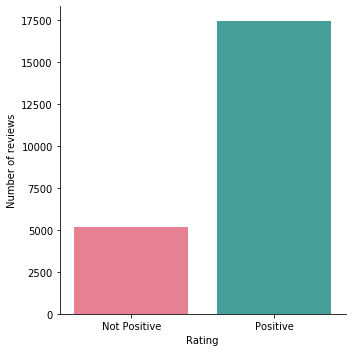

In [45]:
plt.figure(figsize=(11,6))
g = sns.catplot(x='Positively_rated',data = df,kind='count',palette = 'husl')
ax = plt.gca()
ax.set_xticklabels(['Not Positive','Positive'])
ax.set_xlabel('Rating')
ax.set_ylabel('Number of reviews')
plt.tight_layout()
plt.savefig('output/reco_binary_rating_plot.png')

In [48]:
df

,clothing_ID,Age,Title,Text,RAW_Text,review_len,Positive_fb_count,Division,Department,Class,Positively_rated,Reco
original_ind,,,,,,,,,,,,
0,767,33,NaN,absolutelywonderfulsilkyandsexyandcomfortable,Absolutely wonderful - silky and sexy and comf...,45,0,Initmates,Intimate,Intimates,1,1
1,1080,34,NaN,lovethisdressitssoooprettyihappenedtofinditina...,Love this dress! it's sooo pretty. i happene...,224,4,General,Dresses,Dresses,1,1
2,1077,60,some major design flaws,ihadsuchhighhopesforthisdressandreallywantedit...,I had such high hopes for this dress and reall...,389,0,General,Dresses,Dresses,0,0
3,1049,50,my favorite buy,ilovelovelovethisjumpsuititsfunflirtyandfabulo...,"I love, love, love this jumpsuit. it's fun, fl...",94,0,General Petite,Bottoms,Pants,1,1
4,847,47,flattering shirt,thisshirtisveryflatteringtoallduetotheadjustab...,This shirt is very flattering to all due to th...,152,6,General,Tops,Blouses,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,great dress for many occasions,iwasveryhappytosnagthisdressatsuchagreatpricei...,I was very happy to snag this dress at such a ...,101,0,General Petite,Dresses,Dresses,1,1
23482,862,48,wish it was made of cotton,itremindsmeofmaternityclothessoftstretchyshiny...,"It reminds me of maternity clothes. soft, stre...",174,0,General Petite,Tops,Knits,0,1
23483,1104,31,cute but see through,thisfitwellbutthetopwasveryseethroughthisnever...,"This fit well, but the top was very see throug...",159,1,General Petite,Dresses,Dresses,0,0
